# Hypothesis: Shark attacks are especially common during summer afternoons

Introduction: I decided to focus on the correlation between shark attacks and time frames (hourly and monthly).

1) First of all, I did a thorough data cleaning exercise in order to properly draw conclusions.  I will import the clean csv in order to proceed with the analysis. The 'dirty' csv can be found in the notebook called 'Data Cleaning'. Additionally, the necessary libraries will be imported. 

In [39]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import seaborn as sns

In [27]:
df = pd.read_csv('sharks-clean2.csv')

2) Let's take a look at fatal attacks. The bar chart illustrates the split between fatal and non-fatal attacks from the whole dataset. 
By taking a look at the bar chart below, we can notice most of the attacks (c.1800) were not fatal, which means the victim or victims had minor injuries or no injuries at all. Fatal victims, who suffered from several injuries or whose bodies were not even recovered, represent around 17% of the shark attacks dataset. 

<AxesSubplot:title={'center':'Fatal vs non-fatal attacks'}>

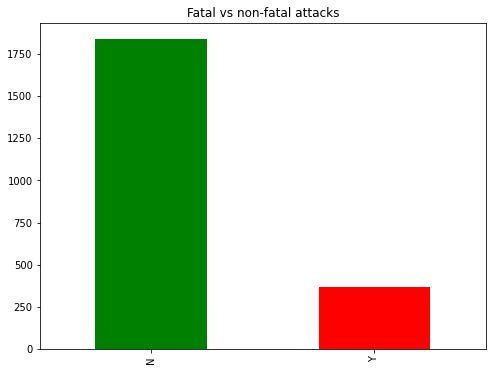

In [93]:
df[df['Fatal (Y/N)'].isin(['Y','N'])]["Fatal (Y/N)"].value_counts()\
.plot(kind='bar',figsize=[8,6], title= "Fatal vs non-fatal attacks", color= ['green','red'])

3) Let's focus on how fatal attacks are distributed throughout time. In this case, we will analyze the data on a monthly basis.
The graph below shows a significant increase in shark attacks from June to September, being July the period with the highest number of occurrences (c.600), followed by August (c.550) and September(c.520). The lowest number of shark attacks can be found during May, February and March.

Text(0.5, 1.0, 'Shark attacks - Monthly Basis')

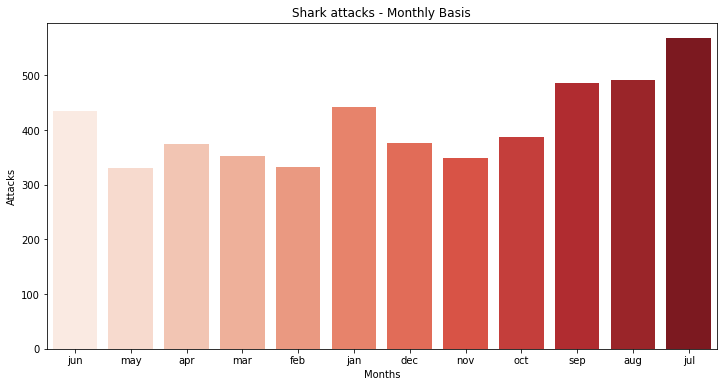

In [54]:
df['month'].value_counts(dropna=False)
%matplotlib inline
plt.figure(figsize=[12,6])
graph_month = sns.countplot(x='month', data=df, palette='Reds')
plt.xlabel('Months')
plt.ylabel ('Attacks')
plt.title('Shark attacks - Monthly Basis')

3.1) Now, in order to assess the fatality of shark attacks, we will split months into fatal and non-fatal accidents in a stacked column chart. 
Even though shark attacks were mostly non-fatal, we can still see there is some difference between the selected time periods (months). December, January and February represent the months with the highest number of fatal shark attacks. In fact, December non-fatal attacks are only twice the number of fatal attacks, which represents a little difference relative to the split of the rest of months.

<AxesSubplot:title={'center':'Fatality - Monthly Basis'}, xlabel='month'>

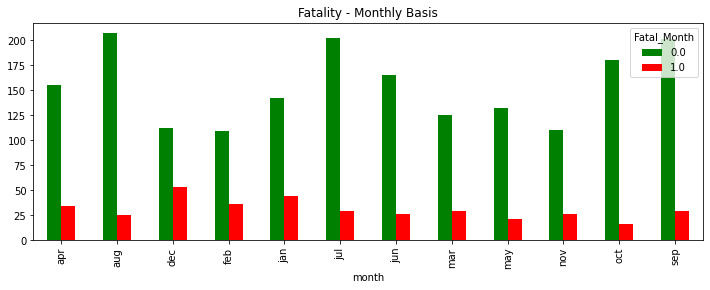

In [91]:
df['Fatal_Month'] = df[df['Fatal (Y/N)'].isin(['Y','N'])]['Fatal (Y/N)']
df['Fatal_Month'] = df['Fatal_Month'].str.replace('N',"0").str.replace('Y',"1").dropna().astype(int)
df.groupby(['month','Fatal_Month'])\
  .size().to_frame().unstack(level="Fatal_Month")[0].plot.bar(figsize=[12,4],title= "Fatality - Monthly Basis", color= ['green','red'])

4) After having analyzed attacks on a monthly basis, I will proceed to analyzing at what time of the day are shark attacks more likely to happen.
The bar chart below shows that the highest number of shark attacks occured during the afternoon session (from 12h00 to 18h00), followed by morning (from 06h00 to 12h00), which makes sense given the daytime activities that the victims were performing at the time of the attack. Evening and night sessions are not representative in this case.

Text(0.5, 1.0, 'Shark attacks - Time of the Day')

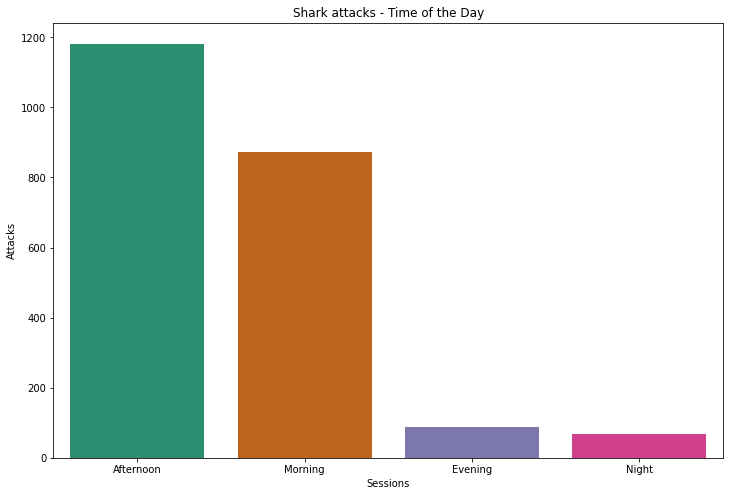

In [82]:
df['sessions'].value_counts()
df.drop(df[df['sessions'] == '0'].index, inplace = True)
df['sessions'].value_counts(dropna=False)
%matplotlib inline
plt.figure(figsize=[12,8])
graph_sessions = sns.countplot(x='sessions', data=df, palette='Dark2')
plt.xlabel('Sessions')
plt.ylabel ('Attacks')
plt.title('Shark attacks - Time of the Day')

4.1) Following the monthly fatality exercise, I decided to perfom the same analysis for the time-of-the-day data. The below bar chart is in line with the previous point since most fatal attacks seem to be centered around morning and afternoon sessions, being this last one the one with the highest percentage of fatal incidents (c.20%). However, in relative terms, fatal ocurrences at night represent nearly 50% of this time session.

<AxesSubplot:title={'center':'Fatality - Based on Time of Day'}, xlabel='sessions'>

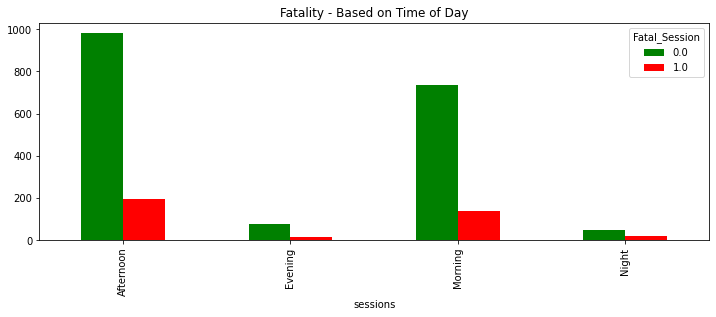

In [92]:
df['Fatal_Session'] = df[df['Fatal (Y/N)'].isin(['Y','N'])]['Fatal (Y/N)']
df['Fatal_Session'] = df['Fatal_Session'].str.replace('N',"0").str.replace('Y',"1").dropna().astype(int)
df.groupby(['sessions','Fatal_Session'])\
  .size().to_frame().unstack(level="Fatal_Session")[0].plot.bar(figsize=[12,4],title= "Fatality - Based on Time of Day", color= ['green','red'])

## Conclusion

Having analyzed the above data and accompanying charts, we can say that most shark attacks were non-fatal, representing over 80% of the cases. Additionally, most incidents occurred during the summer season, which makes sense given the nature of the activities the victims were practicing, such as surfing, paddling or swimming. Moreover, the highest number of ocurrences was during the afternoon sessions, which is probably when victims had more free time to practice the different activities. The fatality time session analysis allows to conclude that nearly half of the attacks were fatal at night, which makes sense given darkness and/or lack of help nearby.
To sum up, I can accept my hypothesis since the conducted analysis supports that shark attacks were especially common during summer and especifically, during the afternoon session.